學號：0111109069 姓名：李佳毓\
作業題目：上傳w3影片的兩個codes檔\
繳交期限：2022/10/1 9:30

# 2.2.1多項式迴歸實作

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Data

In [2]:
np.random.seed(1)
m = 100
x1 = 10 * np.random.rand(m, 1) - 6
y = 10 + 6 * x1 + 5 * x1**2 + 30 * np.random.randn(m,1)

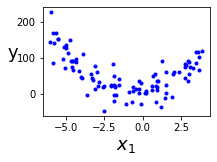

In [3]:
plt.figure(figsize=(3, 2))
plt.plot(x1, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.show()

## 資料前處理 (Preprocession)
### Feature Polynomia轉換(degree=2)

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
x1_p = poly.fit_transform(x1)

In [5]:
x1[0], x1_p[0]

(array([-1.82977995]), array([-1.82977995,  3.34809468]))

### Feature標準化

In [6]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()
x1_ps = scal.fit_transform(x1_p)    #對Feature做標準化

## 配適模型

### Fit : 使用 LinearRegression()

In [7]:
from sklearn.linear_model import LinearRegression

poly_reg = LinearRegression()
poly_reg.fit(x1_ps, y)

LinearRegression()

In [8]:
poly_reg.intercept_, poly_reg.coef_

(array([55.51681743]), array([[17.42161695, 54.04329404]]))

### Fit : 使用SGDRegressor()

In [9]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()
sgd_reg.fit(x1_ps, y.ravel())

SGDRegressor()

In [10]:
sgd_reg.intercept_, sgd_reg.coef_

(array([55.56352038]), array([16.94170371, 53.59058434]))

## Predict

In [11]:
x_new = ([[-5], [1]])
x_new_p = poly.transform(x_new)
x_new_ps = scal.transform(x_new_p)

In [12]:
poly_reg.predict(x_new_ps)

array([[113.63626971],
       [ 19.87706932]])

In [13]:
sgd_reg.predict(x_new_ps)

array([113.6338666 ,  19.97941421])

## 使用Pipline

### 建構Pipeline

In [14]:
from sklearn.pipeline import Pipeline

In [15]:
pip_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scal', StandardScaler()),
    ('poly_reg', LinearRegression())
])

### Fit

In [16]:
pip_reg.fit(x1, y)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()), ('poly_reg', LinearRegression())])

In [17]:
pip_reg['poly_reg'].intercept_, pip_reg['poly_reg'].coef_

(array([55.51681743]), array([[17.42161695, 54.04329404]]))

### Predict

In [18]:
x_new = ([[-5],[1]])

pip_reg.predict(x_new)

array([[113.63626971],
       [ 19.87706932]])

## 繪製模型

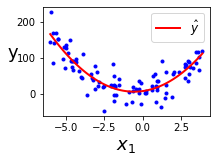

In [19]:
plt.figure(figsize=(3,2))

x1s = np.linspace(x1.min(), x1.max(), 100).reshape(-1,1)
y_pred = pip_reg.predict(x1s)

plt.plot(x1, y, "b.")
plt.plot(x1s, y_pred, "r-", linewidth=2, label="$\hat y$")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=12)

plt.show()

# 2.3.1 正則化線性模型 
## (1)Regularized Linear Model

In [20]:
import numpy as np
import matplotlib.pyplot as plt

### Data

In [21]:
np.random.seed(1)
m = 100
x1 = 10 * np.random.rand(m, 1) - 6
y = 10 + 6 * x1 + 5 * x1**2 + 30 * np.random.randn(m,1)

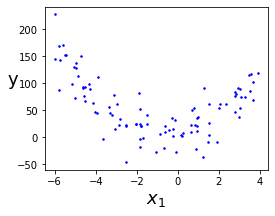

In [22]:
plt.figure(figsize=(4, 3))
plt.plot(x1, y, "b.", markersize=3)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.savefig("plot_1.pdf", dpi=300, bbox_inches='tight')
plt.show()

### Split 訓練集/測試集

In [23]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, \
                                                     random_state=1)

### Ridge Regression

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

### 使用Ridge() : Closed-form

In [25]:
from sklearn.linear_model import Ridge
ridge_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scal', StandardScaler()),
    ('ridge', Ridge(alpha=m/2, random_state=1))
])
ridge_reg.fit(x1_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('ridge', Ridge(alpha=50.0, random_state=1))])

In [26]:
ridge_reg.score(x1_train, y_train), ridge_reg.score(x1_test, y_test)

(0.5624715988861847, 0.5000997386648433)

In [27]:
ridge_reg.predict(x1_test[:3])

array([[50.49773754],
       [59.13869604],
       [31.86781274]])

### 使用SGDRegressor() : 梯度下降

In [28]:
from sklearn.linear_model import SGDRegressor
ridge_sgd = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scal', StandardScaler()),
    ('ridge', SGDRegressor(penalty='l2', alpha=1, random_state=1))
])
ridge_sgd.fit(x1_train, y_train.ravel())

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('ridge', SGDRegressor(alpha=1, random_state=1))])

In [29]:
ridge_sgd.score(x1_train, y_train), ridge_sgd.score(x1_test, y_test)

(0.48914255940966433, 0.4132817374249068)

In [30]:
ridge_sgd.predict(x1_test[:3])

array([47.78375855, 58.58856714, 35.37888686])

### 繪製模型

In [31]:
def plot_model(model, x1, y):
    x1s = np.linspace(x1.min(), x1.max(), 1000).reshape(-1,1)
    y_pred = model.predict(x1s)
    
    plt.plot(x1_train, y_train, 'b.', markersize=3)
    plt.plot(x1_test, y_test, 'gx', markersize=3)
    plt.plot(x1s, y_pred, "r-", linewidth=2, label="$\hat y$")
    
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("y", rotation=0, fontsize=18)
    plt.legend(loc="upper center", fontsize=10)
    plt.axis([x1.min()-0.1, x1.max()+0.1, y.min()-5, y.max()+5])

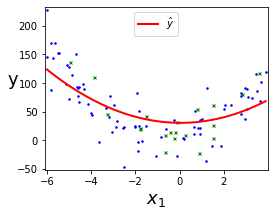

In [32]:
plt.figure(figsize=(4,3))
plot_model(ridge_reg, x1, y)
plt.show()

## (2)Lesso Regression

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

### 使用Lasso()

In [34]:
from sklearn.linear_model import Lasso
lasso_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scal', StandardScaler()),
    ('lasso', Lasso(alpha=1, random_state=1))
])
lasso_reg.fit(x1_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('lasso', Lasso(alpha=1, random_state=1))])

In [35]:
lasso_reg.score(x1_train, y_train), lasso_reg.score(x1_test, y_test)

(0.7289049773635354, 0.7090703555227444)

In [36]:
lasso_reg.predict(x1_test[:3])

array([63.93127861, 47.72171974,  7.57641004])

### 使用SGDRegressor() : 梯度下降

In [37]:
from sklearn.linear_model import SGDRegressor
lasso_sgd = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scal', StandardScaler()),
    ('lasso', SGDRegressor(penalty='l1', alpha=1, random_state=1))
])
lasso_sgd.fit(x1_train, y_train.ravel())

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('lasso', SGDRegressor(alpha=1, penalty='l1', random_state=1))])

In [38]:
lasso_sgd.score(x1_train, y_train), lasso_sgd.score(x1_test, y_test)

(0.7284890196449929, 0.7089179245883366)

In [39]:
lasso_sgd.predict(x1_test[:3])

array([63.65542504, 47.90341769,  7.82005821])

### 繪製模型

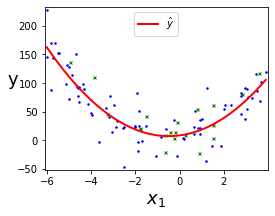

In [40]:
plt.figure(figsize=(4,3))
plot_model(lasso_reg, x1, y)
plt.show()

## (3)Elastic Net

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

### 使用ElasticNet()

In [42]:
from sklearn.linear_model import ElasticNet
elastic_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scal', StandardScaler()),
    ('elastic', ElasticNet(alpha=1, l1_ratio=0.5, random_state=1))
])

In [43]:
elastic_reg.fit(x1_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('elastic', ElasticNet(alpha=1, random_state=1))])

In [44]:
elastic_reg.score(x1_train, y_train), elastic_reg.score(x1_test, y_test)

(0.5863340512948914, 0.5331573407141718)

In [45]:
elastic_reg.predict(x1_test[:3])

array([50.69422872, 58.62751416, 29.73199465])

### 使用SGDRegressor() : 梯度下降

In [46]:
from sklearn.linear_model import SGDRegressor
elastic_sgd = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scal', StandardScaler()),
    ('elastic', SGDRegressor(penalty='l2', l1_ratio=0.5, alpha=1, \
                             random_state=1))
])
elastic_sgd.fit(x1_train, y_train.ravel())

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scal', StandardScaler()),
                ('elastic',
                 SGDRegressor(alpha=1, l1_ratio=0.5, random_state=1))])

In [47]:
elastic_sgd.score(x1_train, y_train), elastic_sgd.score(x1_test, y_test)

(0.48914255940966433, 0.4132817374249068)

In [48]:
elastic_sgd.predict(x1_test[:3])

array([47.78375855, 58.58856714, 35.37888686])

### 繪製模型

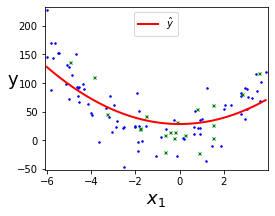

In [49]:
plt.figure(figsize=(4, 3))
plot_model(elastic_reg, x1, y)
plt.show()